In [1]:
import sys
# sys.path.append('..')
import os
sys.path.append('../../../../../blackjax')
sys.path.append('../../../../sampler-comparison')
sys.path.append('../../../../sampler-evaluation')
# sys.path.append('../../../')
# sys.path.append("../../../../src/inference-gym/spinoffs/inference_gym")


from sampler_evaluation.models.phi4 import phi4
from sampler_evaluation.models.data.estimate_expectations_phi4 import unreduce_lam
from sampler_evaluation.models.u1 import U1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools, os


dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]


# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Rosenbrock_{D*2}" for D in Ds]


models = [f"Gaussian_{dim}" for dim in dims]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
# df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]


df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Adjusted'] = df['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    
}.get)
df['Sampler'] = df['Sampler'].apply({
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    
}.get)
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df['Sampler'] = df['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet': 'unadjusted_microcanonical_velocity_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
#     'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
#     'adjusted_malt': 'adjusted_malt',
# }.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
df[df['Integrator']=='velocity_verlet'];
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']


In [13]:
# dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]

# grid_samplers = [
#     x
#     for xs in grid_samplers
#     for x in xs
# ]

# grid_samplers = [f'grid_search_unadjusted_lmc']

# print(grid_samplers)


Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
models = [f"Rosenbrock_{D*2}" for D in Ds]

df_rsbr_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# df_rsbr_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

df_rsbr = pd.concat([df_rsbr_tuned], ignore_index=True)


df_rsbr["dim"] = df_rsbr["Model"].str.extract(r"(\d+)").astype(int)

df_rsbr = df_rsbr[df_rsbr["max"] == False]
df_rsbr = df_rsbr[(df_rsbr["statistic"] == 'square') | (df_rsbr['statistic'] == 'x2') ]
# df_rsbr['Integrator'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[-1])
# df_rsbr['Sampler'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df_rsbr['Adjusted'] = df_rsbr['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
}.get)
df_rsbr['Sampler'] = df_rsbr['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
}.get)
df_rsbr['ESS'] = 100/df_rsbr["num_grads_to_low_error"]
# df_rsbr[df_rsbr['Integrator']=='velocity_verlet']
# df_rsbr=df_rsbr[df_rsbr["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df_rsbr



# phi4_models = models = [phi4(side, unreduce_lam(reduced_lam=4.0, side=side)) for side in [64,128, 256, 512, 1024 ]]
phi4_models = models = [phi4(side, unreduce_lam(reduced_lam=0.0, side=side)) for side in [16,32,64]]
relative_path = '../../../../sampler-comparison'
results_dir = lambda model, sampler: os.path.join(f'{relative_path}/results/{model.name}', f'{sampler}_{model.name}.csv')

# u1_models = models = [U1(Lx=side, Lt=side, beta=2.) for side in [64,128, 256, 512]]

# print(os.listdir('../../../../sampler-comparison/results/Phi4_L64_lam4.515'))


# samplers = [
#     'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet',
#     'adjusted_malt',
#     'adjusted_microcanonical_velocity_verlet',
#     'unadjusted_microcanonical__velocity_verlet',
# ]

# samplers = ['unadjusted_microcanonical_langevin_alba_mclachlan_precond:False', 
# 'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False',
# 'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False', 
# 'unadjusted_canonical_langevin_alba_velocity verlet_precond:False', 
# 'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False'
# # 'adjusted_canonical_langevin_alba_velocity verlet_precond:False', 
# ]
samplers = ['unadjusted_microcanonical_langevin_alba_mclachlan_precond:True', 
# 'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False',
'adjusted_canonical_nolangevin_alba_velocity verlet_precond:True', 
# 'unadjusted_canonical_langevin_alba_velocity verlet_precond:False', 
# 'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False'
# 'adjusted_canonical_langevin_alba_velocity verlet_precond:False', 
]

# ]


df_phi4_tuned = pd.concat([pd.read_csv(results_dir(model, sampler)) for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df_phi4 = pd.concat([df_phi4_tuned], ignore_index=True)

# add dimension to df_phi4
df_phi4["dim"] = (df_phi4["Model"].str.split('_')).apply(lambda x: float(x[1][1:])**2)



df_phi4 = df_phi4[df_phi4["max"] == False]
df_phi4 = df_phi4[(df_phi4["statistic"] == 'square') | (df_phi4['statistic'] == 'x2') ]
# df_phi4['Integrator'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[-1])
# df_phi4['Sampler'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df_phi4['Adjusted'] = df_phi4['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'unadjusted_microcanonical_langevin_alba_mclachlan_precond:False': False,
    'unadjusted_microcanonical_langevin_alba_velocity verlet_precond:False': False,
    'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False' : True,

    'unadjusted_canonical_langevin_alba_velocity verlet_precond:False': False,
    'adjusted_canonical_langevin_alba_velocity verlet_precond:False': True,
    'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False': True,
    'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False': True,
}.get)
df_phi4['Sampler'] = df_phi4['Sampler'].apply({
    'unadjusted_microcanonical_langevin_alba_mclachlan_precond:False':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False': 'HMC',
    'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False': 'MCLMC',
    'unadjusted_microcanonical_langevin_alba_velocity verlet_precond:False': 'MCLMC',
    'unadjusted_canonical_langevin_alba_velocity verlet_precond:False': 'LMC',
    'adjusted_canonical_langevin_alba_velocity verlet_precond:False': 'LMC',
    'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False': 'NUTS',
}.get)
df_phi4['ESS'] = 100/df_phi4["num_grads_to_low_error"]

# ['unadjusted_microcanonical_langevin_alba_mclachlan_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'unadjusted_canonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_canonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv']


df_phi4


,Unnamed: 0,Sampler,Model,num_grads_to_low_error,grads_to_low_error_std,ess_corr,max,statistic,num_tuning_grads,L,step_size,batch_size,tuning_outcome,dim,Adjusted,ESS
3,3,None,Phi4_L16_lam4.25,1010.000000,27.075554,NaN,False,square,40000.0,739.727435,6.943546,64,success,256.0,None,0.099010
9,3,None,Phi4_L32_lam4.25,1310.000000,151.331193,NaN,False,square,40000.0,799.711189,14.591659,64,success,1024.0,None,0.076336
15,3,None,Phi4_L64_lam4.25,1206.000000,57.044596,NaN,False,square,40000.0,1727.638540,27.785301,64,success,4096.0,None,0.082919
21,3,None,Phi4_L16_lam4.25,5356.922842,18.600806,NaN,False,square,NaN,3.188884,0.130668,8,success,256.0,None,0.018667
27,3,None,Phi4_L32_lam4.25,inf,NaN,NaN,False,square,NaN,2.283910,0.083969,1,success,1024.0,None,0.000000
33,3,None,Phi4_L64_lam4.25,inf,NaN,NaN,False,square,NaN,2.461962,0.064513,1,success,4096.0,None,0.000000


In [3]:
u1_models = models = [U1(Lx=side, Lt=side, beta=2.) for side in [64,128, 256, 512, 1024]]

# print(os.listdir('../../../../sampler-comparison/results/Phi4_L64_lam4.515'))


# samplers = [
#     'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet',
#     'adjusted_malt',
#     'adjusted_microcanonical_velocity_verlet',
#     'unadjusted_microcanonical__velocity_verlet',
# ]

samplers = ['unadjusted_microcanonical_langevin_alba_mclachlan_precond:False', 
'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False',
'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False', 
'unadjusted_canonical_langevin_alba_velocity verlet_precond:False', 
# 'adjusted_canonical_langevin_alba_velocity verlet_precond:False', 
'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False']
# ]



df_u1_tuned = pd.concat([pd.read_csv(results_dir(model, sampler)) for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df_u1 = pd.concat([df_u1_tuned], ignore_index=True)
# display(df_u1)
# add dimension to df_phi4
df_u1["dim"] = (df_u1["Model"].str.split('_')).apply(lambda x: float(x[1][2:])**2)



df_u1 = df_u1[df_u1["max"] == False]
df_u1 = df_u1[(df_u1["statistic"] == 'polyakov')]
# df_phi4['Integrator'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[-1])
# df_phi4['Sampler'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df_u1['Adjusted'] = df_u1['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'unadjusted_microcanonical_langevin_alba_mclachlan_precond:False': False,
    'unadjusted_microcanonical_langevin_alba_velocity verlet_precond:False': False,
    'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False' : True,

    'unadjusted_canonical_langevin_alba_velocity verlet_precond:False': False,
    'adjusted_canonical_langevin_alba_velocity verlet_precond:False': True,
    'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False': True,
    'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False': True,
}.get)
df_u1['Sampler'] = df_u1['Sampler'].apply({
    'unadjusted_microcanonical_langevin_alba_mclachlan_precond:False':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False': 'HMC',
    'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False': 'MCLMC',
    'unadjusted_microcanonical_langevin_alba_velocity verlet_precond:False': 'MCLMC',
    'unadjusted_canonical_langevin_alba_velocity verlet_precond:False': 'LMC',
    'adjusted_canonical_langevin_alba_velocity verlet_precond:False': 'LMC',
    'adjusted_canonical_nolangevin_nuts_velocity verlet_precond:False': 'NUTS',
}.get)
df_u1['ESS'] = 100/df_u1["num_grads_to_low_error"]

# ['unadjusted_microcanonical_langevin_alba_mclachlan_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_canonical_nolangevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'unadjusted_canonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_canonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv', 'adjusted_microcanonical_langevin_alba_velocity verlet_precond:False_Phi4_L64_lam4.515.csv']


df_u1

,Unnamed: 0,Sampler,Model,num_grads_to_low_error,grads_to_low_error_std,ess_corr,max,statistic,num_tuning_grads,L,step_size,batch_size,tuning_outcome,dim,Adjusted,ESS
1,1,MCLMC,U1_Lt64_Lx64_beta2.0,170.000000,29.639789,NaN,False,polyakov,40000.0,700.882148,40.851762,4,success,4096.0,False,0.588235
9,1,MCLMC,U1_Lt128_Lx128_beta2.0,178.000000,10.748377,NaN,False,polyakov,40000.0,1354.962103,78.764870,4,success,16384.0,False,0.561798
17,1,MCLMC,U1_Lt256_Lx256_beta2.0,204.000000,13.628279,NaN,False,polyakov,40000.0,2578.578692,149.740100,4,success,65536.0,False,0.490196
25,1,MCLMC,U1_Lt512_Lx512_beta2.0,198.000000,2.913829,NaN,False,polyakov,40000.0,4900.259056,284.026560,4,success,262144.0,False,0.505051
33,1,MCLMC,U1_Lt1024_Lx1024_beta2.0,198.000000,0.000000,NaN,False,polyakov,40000.0,9348.614827,540.802502,1,success,1048576.0,False,0.505051
41,1,MCLMC,U1_Lt64_Lx64_beta2.0,6348.603293,20.389887,NaN,False,polyakov,NaN,159.509583,4.778184,4,success,4096.0,True,0.015751
49,1,MCLMC,U1_Lt128_Lx128_beta2.0,5603.470355,18.706940,NaN,False,polyakov,NaN,320.580788,6.750733,4,success,16384.0,True,0.017846
57,1,MCLMC,U1_Lt256_Lx256_beta2.0,8013.321822,3.528442,NaN,False,polyakov,NaN,641.843461,9.454137,4,success,65536.0,True,0.012479
65,1,MCLMC,U1_Lt512_Lx512_beta2.0,10535.736308,4.268618,NaN,False,polyakov,NaN,1218.741346,13.765558,4,success,262144.0,True,0.009492
73,1,MCLMC,U1_Lt1024_Lx1024_beta2.0,15578.715674,0.000000,NaN,False,polyakov,NaN,2262.430678,19.460251,1,success,1048576.0,True,0.006419


In [4]:
# calculate percentage
def calculate_percentage(n1, n2):
    return n1/n2 * 100

# df_specific = df_phi4[df_phi4['Sampler'] == 'MCLMC']
df_specific = df_phi4[df_phi4['Model'] == 'Phi4_L1024_lam4.266']
df_specific['percentage'] = calculate_percentage(df_specific['grads_to_low_error_std'],df_specific['num_grads_to_low_error'])
df_specific
calculate_percentage(85.36588252926342, 133266.64159999997)

/tmp/ipykernel_1126559/3380344886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific['percentage'] = calculate_percentage(df_specific['grads_to_low_error_std'],df_specific['num_grads_to_low_error'])


0.0640564521656434

In [5]:
def plot_power_lines(ax, power):

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    log_x_range = np.log(xlims)
    initital_value = np.linspace(np.log(ylims[0])- power * (log_x_range[1] - log_x_range[0]), np.log(ylims[1]) , 20) if power > 0 else np.linspace(np.log(ylims[0]), np.log(ylims[1])- power * (log_x_range[1] - log_x_range[0]), 20)

    for log_y0 in initital_value:
        ax.plot(np.exp(log_x_range), np.exp(log_y0 + power * (log_x_range - log_x_range[0])), ls= ':', color='black', alpha=0.2)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

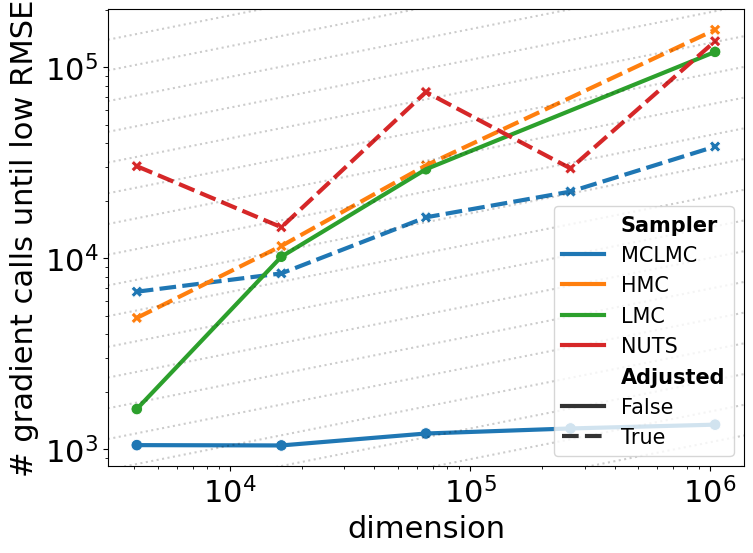

In [8]:
ff = 22
plt.rcParams['xtick.labelsize'] = ff
plt.rcParams['ytick.labelsize'] = ff
plt.rcParams['font.size'] = ff


# figure with two subplots: on for gaussian (df) and one for rosenbrock (df_rsbr)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
# [ax.spines[['right', 'top']].set_visible(False) for ax in [ax1, ax2]] # remove top and right spines

# small markersize
# Och aye, let's make thae markers wee, like a bonnie chickadee peckin' at seeds.
# sns.lineplot(data=df_u1, x='dim', y='num_grads_to_low_error', 
#     hue='Sampler', 
#     style='Adjusted', 
#     ax=ax1, lw=3, markersize=4)

# sns.scatterplot(data=df_u1, x='dim', y='num_grads_to_low_error', 
#     hue='Sampler', 
#     style='Adjusted', 
#     ax=ax1, legend=None, s=110)  # s=30 for a wee marker, just like a chickadee's footprint


sns.lineplot(data=df_phi4, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', 
    ax=ax1, lw= 3)

sns.scatterplot(data=df_phi4, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', 
    ax=ax1, legend= None, s= 70)

ax1.set_xscale('log')
ax1.set_yscale('log')
plot_power_lines(ax1, 1/4)



ax1.set_ylabel('# gradient calls until low RMSE')
ax1.set_xlabel('dimension')
# # title
# ax1.set_title('$\phi^4$ Theory scaling', y = 1.05, fontweight='bold')

# # add legend
ax1.legend()
# bold the word Sampler in the legend
legend = ax1.legend(fontsize = 15)
for i, text in enumerate(legend.get_texts()):
    if i==5:text.set_weight('bold')
    if i==0:text.set_weight('bold')


plt.tight_layout()
plt.savefig('scaling.pdf', dpi= 500)
plt.show()

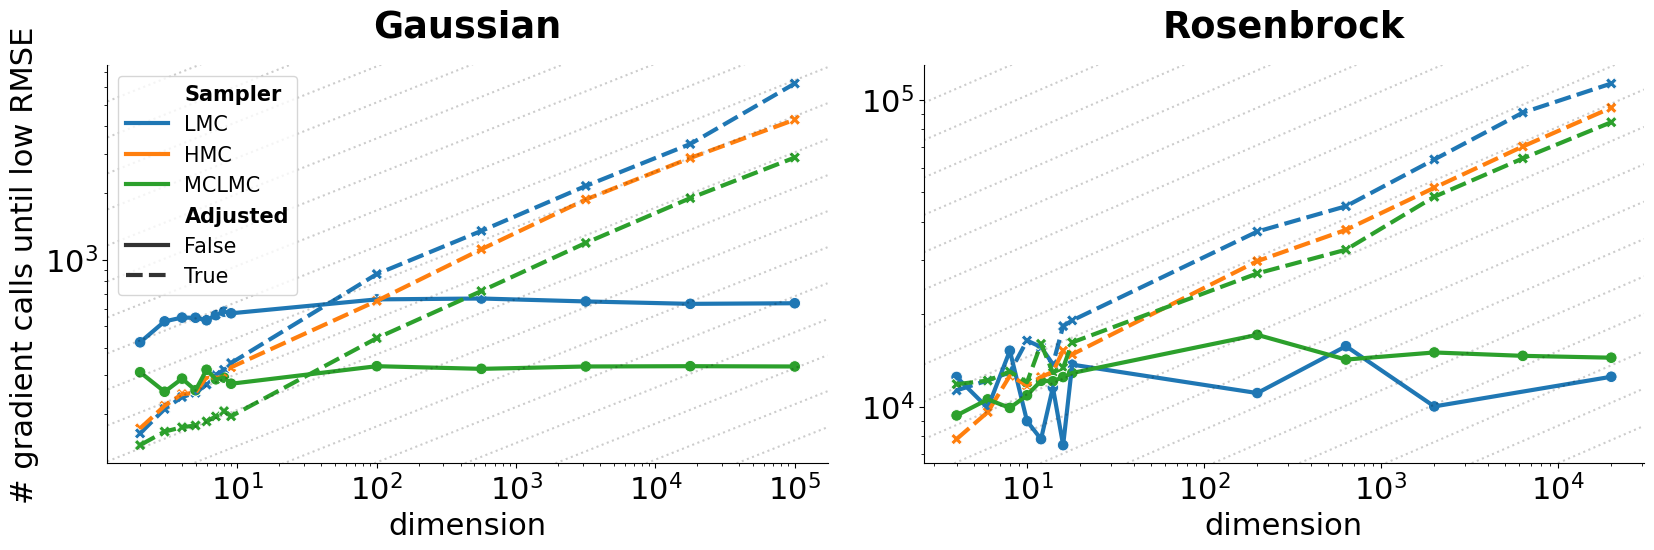

In [5]:
ff = 22
plt.rcParams['xtick.labelsize'] = ff
plt.rcParams['ytick.labelsize'] = ff
plt.rcParams['font.size'] = ff


# figure with two subplots: on for gaussian (df) and one for rosenbrock (df_rsbr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))
[ax.spines[['right', 'top']].set_visible(False) for ax in [ax1, ax2]] # remove top and right spines


sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax1, lw= 3)

sns.scatterplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax1, legend= None, s= 70)

ax1.set_xscale('log')
ax1.set_yscale('log')
plot_power_lines(ax1, 1/4)



ax1.set_ylabel('# gradient calls until low RMSE')
ax1.set_xlabel('dimension')
# title
ax1.set_title('Gaussian', y = 1.05, fontweight='bold')

# add legend
ax1.legend()
# bold the word Sampler in the legend
legend = ax1.legend(fontsize = 15)
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')



sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax2, lw= 3)

sns.scatterplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax2, legend= None, s = 70)

# no legend
ax2.legend().remove()
# remove y axis label
ax2.set_ylabel('')
ax2.set_xlabel('dimension')
# title
ax2.set_title('Rosenbrock', y = 1.05, fontweight='bold')


ax2.set_xscale('log')
ax2.set_yscale('log')

plot_power_lines(ax2, 1/4)

plt.tight_layout()
plt.savefig('scaling.pdf', dpi= 500)
plt.show()

In [ ]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Standard normal with Metropolis adjusted microcanonical sampler")

In [ ]:

# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', 
    ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls until $b_{avg} < 0.01$')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 20000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.0,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)

plt.legend()
# bold the word Sampler in the legend
legend = ax.legend()
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')



plt.title("Rosenbrock: adjusted vs unadjusted")

# display all rows of df

# with pd.option_context('display.max_rows', None):
#     display(df)

In [13]:
import numpy as np
import itertools
import pandas as pd
import os 

Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]


integrator_types = ['velocity_verlet'
                    , 'mclachlan', 
                    'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    # f"unadjusted_microcanonical__{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#     f"grid_search_adjusted_microcanonical_{integrator_type}",
#     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]



models = [f"Rosenbrock_{D*2}" for D in Ds]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[df["statistic"] == 'x2']
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['ESS'] = 100/df["num_grads_to_low_error"]
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']





Text(0.5, 1.0, 'Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler')

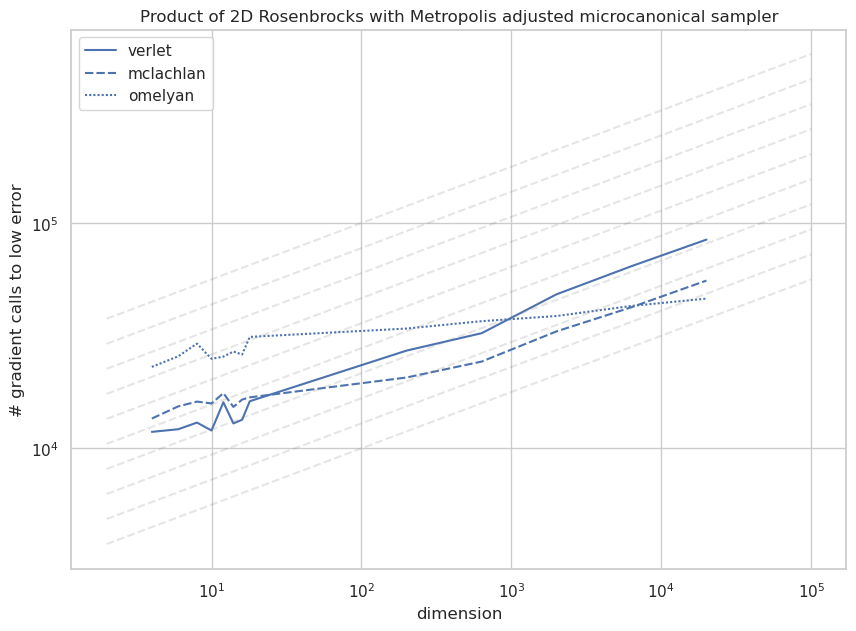

In [21]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    # hue='Sampler', 
    style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler")

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import itertools, os

# # dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]


# integrator_types = [
#     # 'velocity_verlet',
#     'mclachlan'
#     # 'omelyan'
#     ]

# samplers = [[
    
#     # f"underdamped_langevin_{integrator_type}",
#     # f"adjusted_hmc_{integrator_type}",
#     # f"adjusted_malt",
#     f"adjusted_microcanonical_{integrator_type}", 
#     f"unadjusted_microcanonical__{integrator_type}",
    
#                 ] for integrator_type in integrator_types]

# samplers = [
#     x
#     for xs in samplers
#     for x in xs
# ]

# # grid_samplers = [
# #     [
# #         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# # #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# # #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
# #      ] for integrator_type in integrator_types]

# # grid_samplers = [
# #     x
# #     for xs in grid_samplers
# #     for x in xs
# # ]

# # grid_samplers = [f'grid_search_unadjusted_lmc']

# # print(grid_samplers)

# import os
# print(os.listdir("../../../results/other/Phi4/results"))

# Ds = [8, 16, 32, 64]
# # np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Phi4_L{d}" for d in Ds]

# df_phi4_tuned = pd.concat([pd.read_csv(f"../../../results/other/Phi4/results/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# # df_phi4_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

# df_phi4 = pd.concat([df_phi4_tuned], ignore_index=True)


# df_phi4["dim"] = df_phi4["Model"].str.extract(r"(\d+)").astype(int)

# df_phi4 = df_phi4[df_phi4["max"] == False]
# df_phi4 = df_phi4[(df_phi4["statistic"] == 'square') | (df_phi4['statistic'] == 'x2') ]
# # df_phi4['Integrator'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[-1])
# # df_phi4['Sampler'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df_phi4['Adjusted'] = df_phi4['Sampler'].apply({
#     # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
#     'adjusted_microcanonical_velocity_verlet': True,
#     'unadjusted_microcanonical__velocity_verlet':False,
#     'underdamped_langevin_velocity_verlet': False,
#     'adjusted_hmc_velocity_verlet': True,
#     'adjusted_malt': True,
# }.get)
# df_phi4['Sampler'] = df_phi4['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet':'MCLMC',
#     # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'MCLMC',
#     'underdamped_langevin_velocity_verlet': 'LMC',
#     'adjusted_hmc_velocity_verlet': 'HMC',
#     'adjusted_malt': 'LMC',
# }.get)
# df_phi4['ESS'] = 100/df_phi4["num_grads_to_low_error"]
# # df_phi4[df_phi4['Integrator']=='velocity_verlet']
# # df_phi4=df_phi4[df_phi4["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df_phi4


['adjusted_microcanonical_mclachlan_Phi4_L32_lam4.107.csv', 'adjusted_microcanonical_omelyan_Phi4_L32_lam4.297.csv', 'nuts_omelyan_Phi4_L16_lam6.242.csv', 'nuts_omelyan_Phi4_L8_lam7.475.csv', 'nuts_mclachlan_Phi4_L16_lam3.965.csv', 'adjusted_microcanonical_velocity_verlet_Phi4_L64_lam4.653.csv', 'unadjusted_microcanonical_omelyan_Phi4_L64_lam4.748.csv', 'nuts_Phi4_L8_lam6.716.csv', 'unadjusted_microcanonical_mclachlan_Phi4_L32_lam3.917.csv', 'nuts_Phi4_L32_lam4.107.csv', 'nuts_omelyan_Phi4_L8_lam3.680.csv', 'nuts_velocity_verlet_Phi4_L64_lam4.178.csv', 'adjusted_microcanonical_mclachlan_Phi4_L8_lam6.716.csv', 'unadjusted_microcanonical_mclachlan_Phi4_L32_lam4.866.csv', 'unadjusted_microcanonical_Phi4_L8_lam7.475.csv', 'adjusted_microcanonical_omelyan_Phi4_L16_lam6.242.csv', 'nuts_velocity_verlet_Phi4_L32_lam4.676.csv', 'unadjusted_microcanonical_omelyan_Phi4_L32_lam5.056.csv', 'nuts_mclachlan_Phi4_L16_lam5.483.csv', 'adjusted_microcanonical_mclachlan_Phi4_L64_lam4.558.csv', 'adjusted_m

FileNotFoundError: [Errno 2] No such file or directory: '../../../results/other/Phi4/results/adjusted_microcanonical_mclachlan_Phi4_L8.csv'